## Задание

#### Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

### Признаки:
#### 1.satisfaction_level - Уровень удовлетворенности работой
#### 2.Last_evaluation - Время с момента последней оценки в годах
#### 3.number_projects - Количество проектов, выполненных за время работы
#### 4.average_monthly_hours - Среднее количество часов на рабочем месте в месяц
#### 5.time_spend_company - Стаж работы в компании в годах
#### 6.work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
#### 7.left - уволился ли сотрудник
#### 8.promotion_last_5years - повышался ли сотрудник за последние пять лет
#### 9.department - отдел в котором работает сотрудник
#### 10.salary - относительный уровень зарплаты

### Импорт библиотек

In [121]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.metrics import precision_recall_curve, classification_report

### Задание 1
#### Загрузите файл HR.csv в pandas dataframe

In [42]:
work_data = pd.read_csv('C:/Users/bev20/OneDrive/Desktop/Python 2.0/DiplomWork/HR.csv')
work_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
work_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### В файле данные по 14999 сотрудникам, пропусков нет

### Задание 2
#### Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [29]:
work_data.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [76]:
# Определяем все статистики (кроме Моды)
data_other = work_data.agg(['min','max', np.mean, 'std', np.median])
data_other

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,IT,high
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,technical,medium
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN


In [80]:
# Определяем Моду (их может быть несколько)
data_mode = work_data.iloc[:,0:10].mode()
data_mode

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Итоговая таблица со всеми статитиками
Statistical = data_other.append(data_mode)
Statistical

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,IT,high
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,technical,medium
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
0,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000,sales,low
1,NaN,NaN,NaN,156.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Задание 3
#### Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. 
#### Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [4]:
corr_matrix = work_data.corr().round(4)
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.0000,0.1050,-0.1430,-0.0200,-0.1009,0.0587,-0.3884,0.0256
last_evaluation,0.1050,1.0000,0.3493,0.3397,0.1316,-0.0071,0.0066,-0.0087
number_project,-0.1430,0.3493,1.0000,0.4172,0.1968,-0.0047,0.0238,-0.0061
average_montly_hours,-0.0200,0.3397,0.4172,1.0000,0.1278,-0.0101,0.0713,-0.0035
time_spend_company,-0.1009,0.1316,0.1968,0.1278,1.0000,0.0021,0.1448,0.0674
Work_accident,0.0587,-0.0071,-0.0047,-0.0101,0.0021,1.0000,-0.1546,0.0392
left,-0.3884,0.0066,0.0238,0.0713,0.1448,-0.1546,1.0000,-0.0618
promotion_last_5years,0.0256,-0.0087,-0.0061,-0.0035,0.0674,0.0392,-0.0618,1.0000


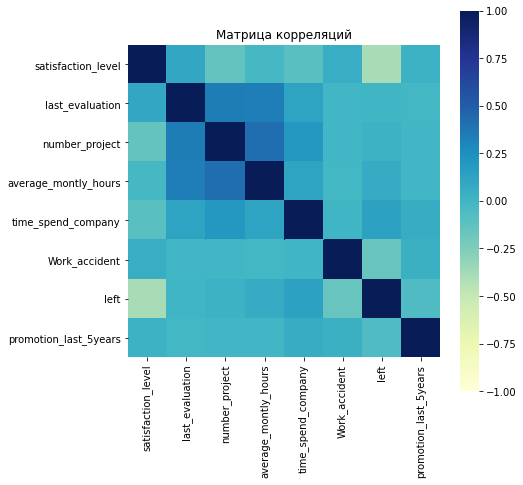

In [5]:
plt.figure(figsize=(7, 7))
ax = plt.axes()
ax.set_title('Матрица корреляций')
sns.heatmap(corr_matrix, cmap = 'YlGnBu', square=True, vmin = -1, vmax = 1)
plt.show()

### Вывод
Исходя из матрицы корреляций и тепловой карты наиболее скоррелированными являются:
number_project (Количество проектов, выполненных за время работы) и average_montly_hours (Среднее количество часов на рабочем месте в месяц): corr = 0.417. Зависимость прямопропорциональная - чем больше кол-во проектов, тем выше среднее кол-во часов, проведенных на рабочем месте

Исходя из матрицы корреляций и тепловой карты наименее скоррелированными являются:
Work_accident (Происходили ли несчастные случаи на рабочем месте с сотрудником) и time_spend_company (Стаж работы в компании в годах): corr = 0.0021.

### Задание 4
#### Рассчитайте сколько сотрудников работает в каждомдепартаменте.

In [6]:
work_data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

### Задание 5
#### Распределение сотрудников по зарплатам

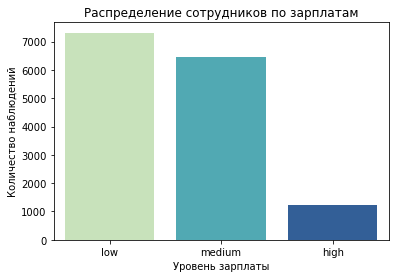

In [9]:
sns.countplot(data = work_data, x = 'salary', palette = sns.color_palette("YlGnBu", 3))
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество наблюдений')
plt.show()

### Задание 6
#### Распределение сотрудников по зарплатам в каждом департаменте по отдельности

C:\Users\bev20\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


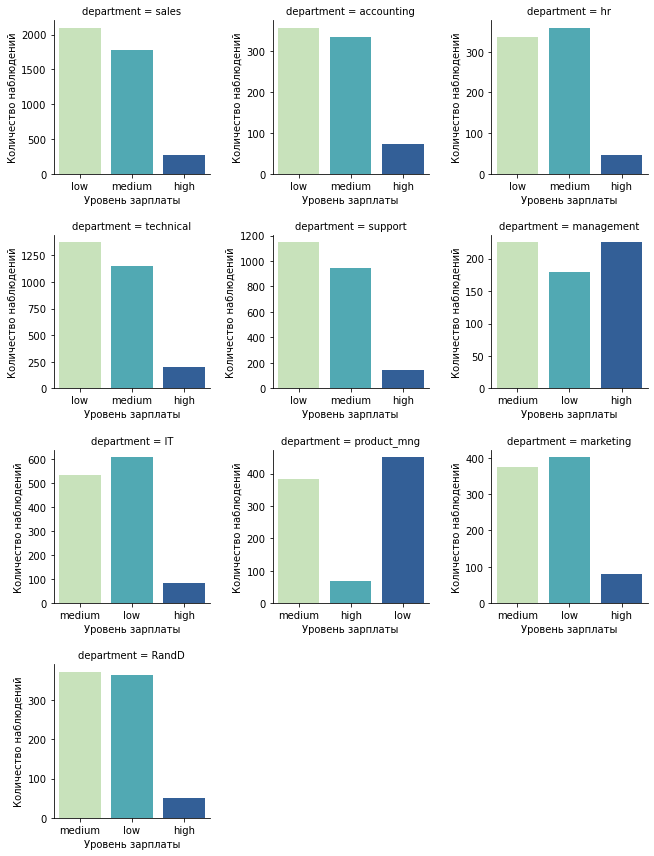

In [14]:
fig = (sns.FacetGrid(data=work_data, col='department', col_wrap = 3, sharex = False, sharey = False)
       .map(sns.countplot, 'salary', palette = sns.color_palette("YlGnBu", 3)))

for i in range(len(work_data['department'].unique())):
    fig.axes[i].set_xlabel('Уровень зарплаты')
    fig.axes[i].set_ylabel('Количество наблюдений')
    
plt.subplots_adjust(hspace=0.4, wspace=0.4)

### Задание 7
#### Проверка гипотезы, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

<AxesSubplot:title={'center':'Распределение времени на рабочем месте'}, ylabel='Frequency'>

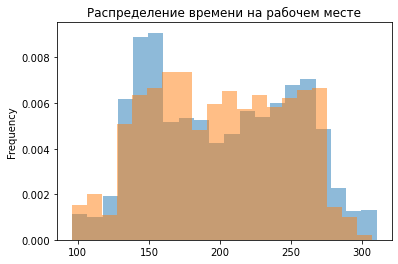

In [33]:
var = work_data[work_data['salary'].isin(['low','high'])]
var.set_index('salary', inplace = True)
var_low  = var.loc['low','average_montly_hours']  # Выборка сотрудников с низким окладом
var_high = var.loc['high','average_montly_hours']  # Выборка сотрудников с высоким окладом

# визуализация 2-х распределений
var_low.plot(kind='hist', 
                     title='Распределение времени на рабочем месте',
                     alpha = 0.5,
                     bins=20,
                     density = True)


var_high.plot(kind='hist', 
                     title='Распределение времени на рабочем месте',
                     alpha = 0.5,
                     bins=20,
                     density = True)

In [34]:
t, p_value = stats.ttest_ind(var_low, var_high) #Критерий Стьюдента (t-test)
t, p_value

(0.7288680398062308, 0.4661023478267259)

T-статистика - 0.729
P-value - 0.466
p-value > 0.05 
Следовательно 0-вая гипотеза (что сотрудники с разным уровнем зарплаты проводят одинаковое кол-во времени на рабочем времени) не отвергается

### Задание 8
#### Рассчет показателей среди уволившихся и неуволившихся сотрудников (по отдельности):
#### Доля сотрудников с повышением за последние 5 лет
#### Средняя степень удовлетворенности
#### Среднее количество проектов

In [67]:
work_data[['promotion_last_5years', 'satisfaction_level', 'number_project', 'left']].groupby('left').mean()

,promotion_last_5years,satisfaction_level,number_project
left,,,
0,0.026251,0.666810,3.786664
1,0.005321,0.440098,3.855503


### Задание 9

#### Разделить данные на тестовую и обучающую выборки
#### Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) 
#### Оценить качество модели на тестовой выборке

In [97]:
X = work_data.drop(['left', 'department', 'salary'], axis = 1)
Y = work_data['left']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state = 1984)

In [98]:
len(y_test)

6000

In [99]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [100]:
# обучаем данные
lda = LinearDiscriminantAnalysis()

In [101]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [112]:
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score

In [104]:
accuracy_score(y_test, lda.predict(X_test))

0.765

### Вывод 1: модель с точностью 76.5 % делает верный прогноз

In [114]:
# Матрица ошибок
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[4244  347]
 [1063  346]]


In [115]:
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_test, y_pred).ravel()
prec =true_positive / (true_positive + false_positive)
rec = true_positive / (true_positive + false_negative)

In [116]:
#Precision отражает, насколько надежна модель при классификации Positive-меток ( в нашем случае это left=1)
prec

0.49927849927849927

In [118]:
# Recall измеряет способность модели обнаруживать выборки, относящиеся к классу Positive. Чем выше recall, тем больше Positive семплов было найдено.
rec

0.24556422995031937

In [123]:
report = classification_report(y_test, lda.predict(X_test), target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      4591
           1       0.50      0.25      0.33      1409

    accuracy                           0.77      6000
   macro avg       0.65      0.58      0.59      6000
weighted avg       0.73      0.77      0.73      6000



### Вывод 2: 
### Precision (точность) - вероятность того, что сотрудник, определенный моделью как ушедший (прогноз left=1) действительно ушел (прогнозное значение left=1)  невысокая (менее 50%).
### Recall (полнота) - вероятность того, что ушедший сотрудник (left =1) будет спрогнозирован моделью как ушедший 24% 
### Точность модели LDA невысокая